In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def get_proper_df(file, skip=8, cols=[0, 1, 2, 5]):
    df = pd.read_excel(file, skiprows=skip, index_col=0)
    df.set_index(pd.to_datetime(df.index), inplace=True)
    df = df.iloc[:, cols]
    return df.rename(columns={df.columns[-1]: "Alti NGF"})

In [3]:
data_folder1 = os.path.join("data", "Bigny")

srce1 = {
    "Pre_Martial": "Pre_Martial_modele.xlsx",
    "Arnet": "Arnet_modele.xlsx",
    "Le_Cher": "Le_cher_modele.xlsx",
    "LP1": "LP1_modele.xlsx",
    "Chevalier": "Chevalier_modele.xlsx"
}

data1 = {k: get_proper_df(os.path.join(data_folder1, v)) for k, v in srce1.items()}

data1["LP1"].head()

,Charge hydraulique[cm],Température[°C],Profondeur eau / sol (cm),Alti NGF
Date/time,,,,
2014-11-17 16:00:00,37.3,13.883,147.700,139.32300
2014-11-17 16:15:00,37.3,13.883,147.700,139.32300
2014-11-17 16:30:00,37.767,13.883,147.233,139.32767
2014-11-17 16:45:00,37.883,13.883,147.117,139.32883
2014-11-17 17:00:00,37.767,13.883,147.233,139.32767


In [4]:
data_folder2 = os.path.join("data", "Thenioux")

srce2 = {
    "Trou_Veve": "trou_veve_mod\x8ale.xlsx",
    "Le_Cher": "Le_Cher_mod\x8ale.xlsx",
    # "Visons": "Visons_mod\x8ale.xlsx",
    "Joulins": "Joulins_mod\x8ale.xlsx",
    "Pre_Pery": "Pre_du_Pery_modele_1.xlsx",
    # "Gue_Vincent": "Gue_Vincent_modele.xlsx"
}

data2 = {k: get_proper_df(os.path.join(data_folder2, v), skip=9, cols=[0, 2, 3, 6]) for k, v in srce2.items()}
data2["Gue_Vincent"] = get_proper_df(os.path.join(data_folder2, "Gue_Vincent_modele.xlsx"))
data2["Visons"] = get_proper_df(os.path.join(data_folder2, "Visons_mod\x8ale.xlsx"), skip=9)

data2["Visons"].head()

,Charge hydraulique[cm],Température[°C],Profondeur eau / sol (cm),Alti NGF
Date/time,,,,
2015-04-28 16:00:00,110.842,12.993,165.750,88.09417
2015-04-28 16:15:00,110.842,12.993,165.750,88.09417
2015-04-28 16:30:00,111.017,12.993,165.575,88.09592
2015-04-28 16:45:00,110.792,12.993,165.800,88.09367
2015-04-28 17:00:00,110.792,12.993,165.800,88.09367


In [5]:
data_folder_q = os.path.join("data", "debits")
os.listdir(data_folder_q)

['QStAmand1.txt',
 'QStAmandSelles3.txt',
 'QStAmandSelles2.txt',
 'QStamandSelles4.txt',
 'Qselles1.txt',
 '.~lock.QStAmandSelles2.txt#']

In [6]:
df = pd.read_csv(os.path.join(data_folder_q, "QStAmandSelles2.txt"), encoding="latin", sep=";", skiprows=4, usecols=[3, 4, 5], names=["Date", "Time", "Q_m3/s"], skipfooter=8022, engine='python')
df.dropna(inplace=True)
df["IndexToSet"] = df["Date"].map(str) + " " + df["Time"]
df.set_index(pd.to_datetime(df["IndexToSet"]), inplace=True)
stamand = df["Q_m3/s"]
stamand.tail()

IndexToSet
2016-08-28 07:00:00    1.77
2016-08-28 08:00:00    1.77
2016-08-28 09:00:00    1.76
2016-08-28 10:00:00    1.77
2016-08-28 11:00:00    1.77
Name: Q_m3/s, dtype: float64

In [7]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


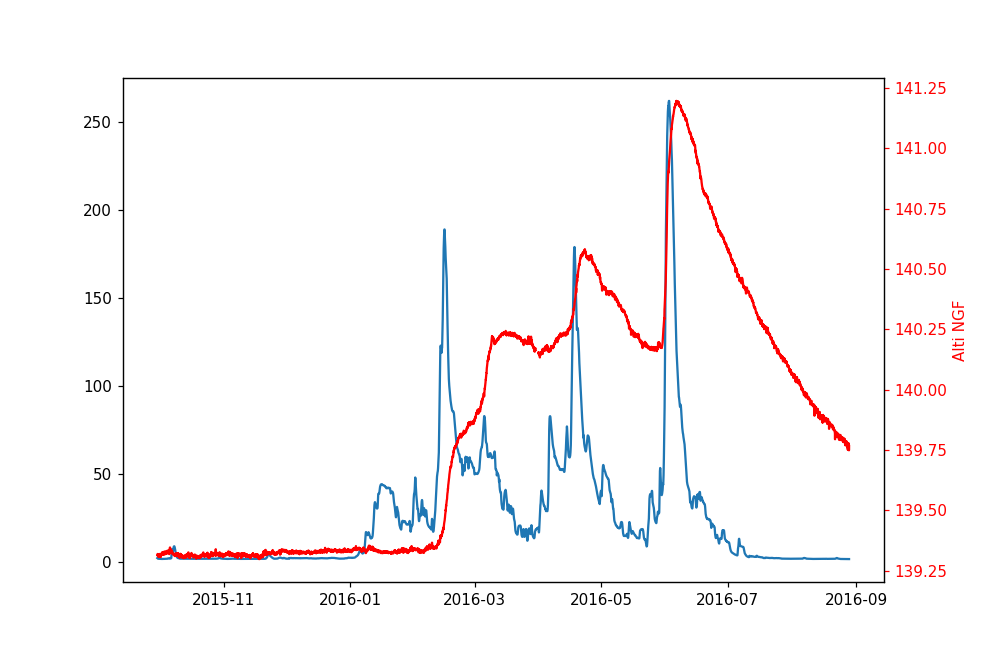

In [8]:
%matplotlib notebook

alti = data1["Arnet"]["Alti NGF"].resample("1H").mean()

test = pd.concat([stamand, alti], axis=1, join='inner')

fig, ax1 = plt.subplots(figsize=(9, 6))

ax1.plot(test["Q_m3/s"])

ax2 = ax1.twinx()

ax2.plot(test["Alti NGF"], color="r")
ax2.set_ylabel('Alti NGF', color='r')
ax2.tick_params('y', colors='r')
plt.savefig("full_period.png")

<IPython.core.display.Javascript object>


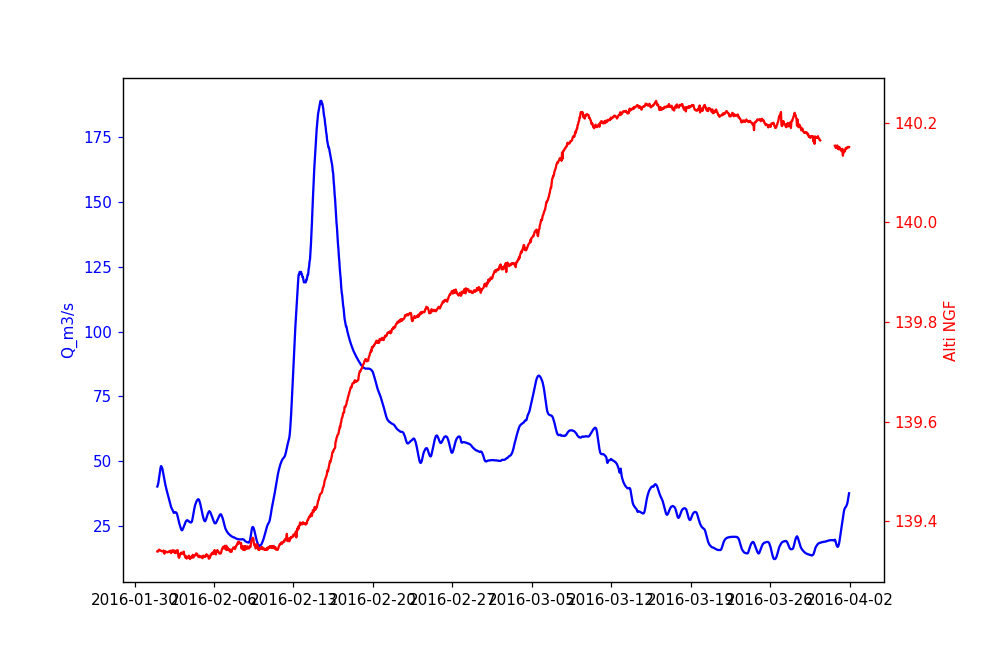

In [9]:
start = "2016-02-01"
stop = "2016-04-01"

fig, ax1 = plt.subplots(figsize=(9, 6))

ax1.plot(test["Q_m3/s"].loc[start:stop], color="b")
ax1.set_ylabel('Q_m3/s', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(test["Alti NGF"].loc[start:stop], color="r")
ax2.set_ylabel('Alti NGF', color='r')
ax2.tick_params('y', colors='r')
plt.savefig("period1.png")

<IPython.core.display.Javascript object>


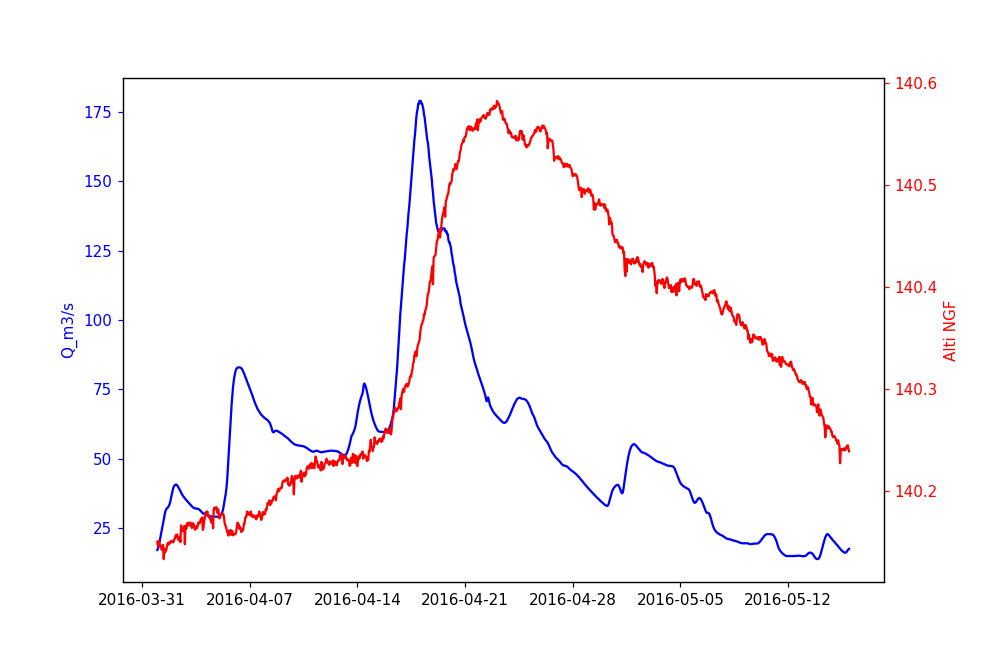

In [10]:
start = "2016-04-01"
stop = "2016-05-15"

fig, ax1 = plt.subplots(figsize=(9, 6))

ax1.plot(test["Q_m3/s"].loc[start:stop], color="b")
ax1.set_ylabel('Q_m3/s', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(test["Alti NGF"].loc[start:stop], color="r")
ax2.set_ylabel('Alti NGF', color='r')
ax2.tick_params('y', colors='r')
plt.savefig("period2.png")

<IPython.core.display.Javascript object>


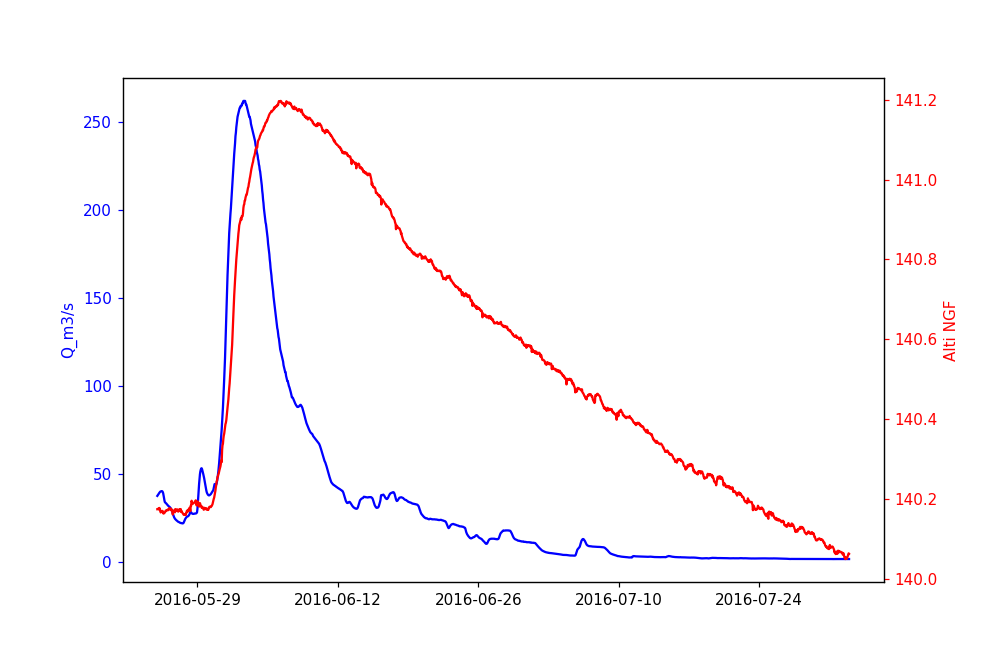

In [11]:
start = "2016-05-25"
stop = "2016-08-01"

fig, ax1 = plt.subplots(figsize=(9, 6))

ax1.plot(test["Q_m3/s"].loc[start:stop], color="b")
ax1.set_ylabel('Q_m3/s', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(test["Alti NGF"].loc[start:stop], color="r")
ax2.set_ylabel('Alti NGF', color='r')
ax2.tick_params('y', colors='r')
plt.savefig("period3.png")

In [12]:
results = {}
end = 30*24
for start, stop in [("2016-02-01", "2016-04-01"), ("2016-04-01", "2016-05-15"), ("2016-05-25", "2016-08-01")]:
    results[(start, stop)] = {}
    to_shift = test["Alti NGF"].loc[start:stop].copy()
    base = test["Q_m3/s"].loc[start:stop]
    for i in range(1, end):
        to_shift = to_shift.shift(-1)
        results[(start, stop)][i] = pd.concat([base, to_shift], axis=1).corr().loc["Q_m3/s", "Alti NGF"]

results[("2016-02-01", "2016-04-01")][1]

-0.30230999475911696

<IPython.core.display.Javascript object>


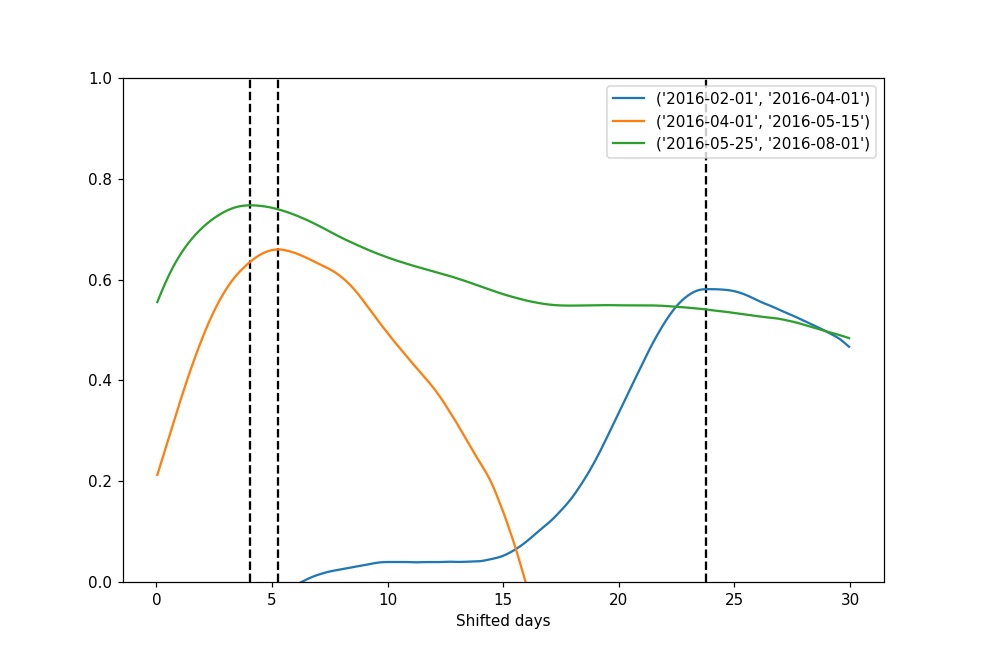

In [14]:
plt.figure(figsize=(9, 6))

for k, v in results.items():
    values = [v[i] for i in range(1, end)]
    plt.plot(np.array(range(1, end))/24, values, label=k)
    max_val = max(values)
    idx_max_val = values.index(max_val)
    plt.vlines(idx_max_val/24, linestyles="--", ymin=0, ymax=1)

plt.ylim(0, 1)
plt.xlabel("Shifted days")
plt.legend()
plt.savefig("shifted_corr.png")